In [1]:
pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 488.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.4 MB/s eta 0:00:00
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=b7d8505eff2b68bc412682bb675a0e22b2cba102aa06bb3e807490b622309ced
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import graphviz.backend as be

In [3]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [4]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

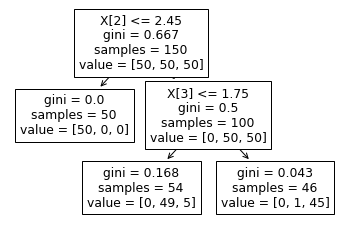

In [5]:
from sklearn.tree import plot_tree
plot_tree(clas)

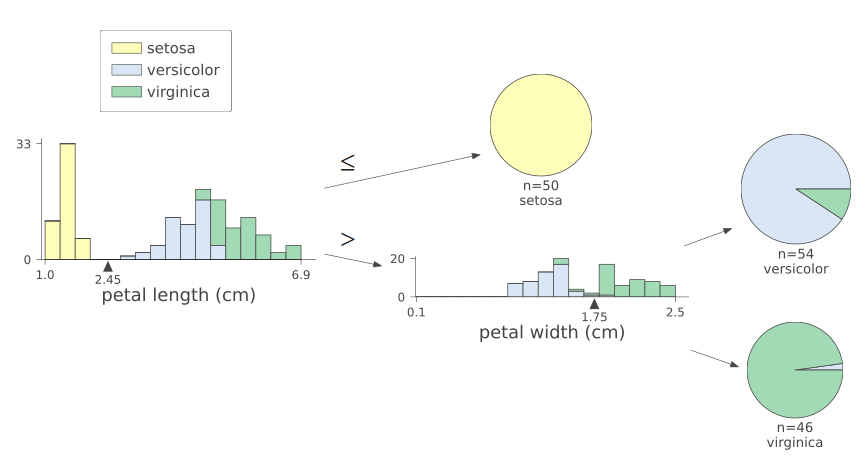

In [6]:
#1. Classification
viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               scale=2,
               orientation='LR'

               )
viz

In [7]:
#Regression
reg=tree.DecisionTreeRegressor(max_depth=1)
boston=load_boston()
x_train=boston.data
y_train=boston.target
reg.fit(x_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

DecisionTreeRegressor(max_depth=1)

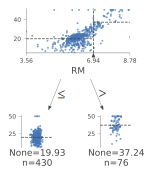

In [8]:
viz=dtreeviz(reg,
             x_train,
             y_train,
             feature_names=boston.feature_names,
             
             
             )
viz

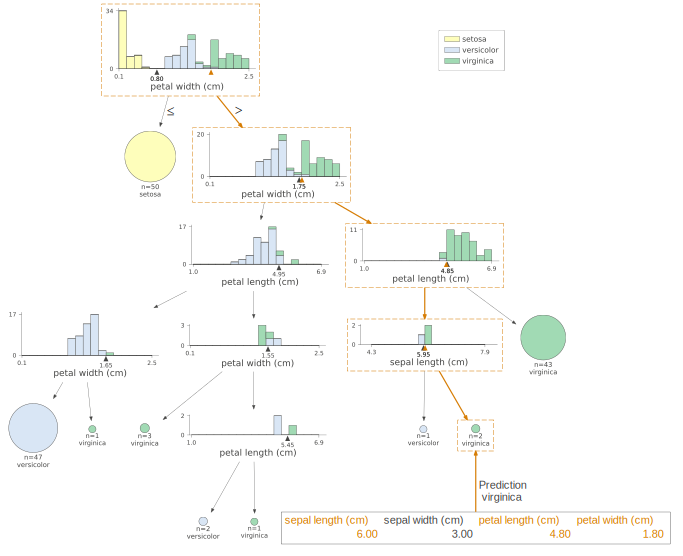

In [9]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

#show path
X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               X=X)
viz

In [10]:
X

array([6. , 3. , 4.8, 1.8])

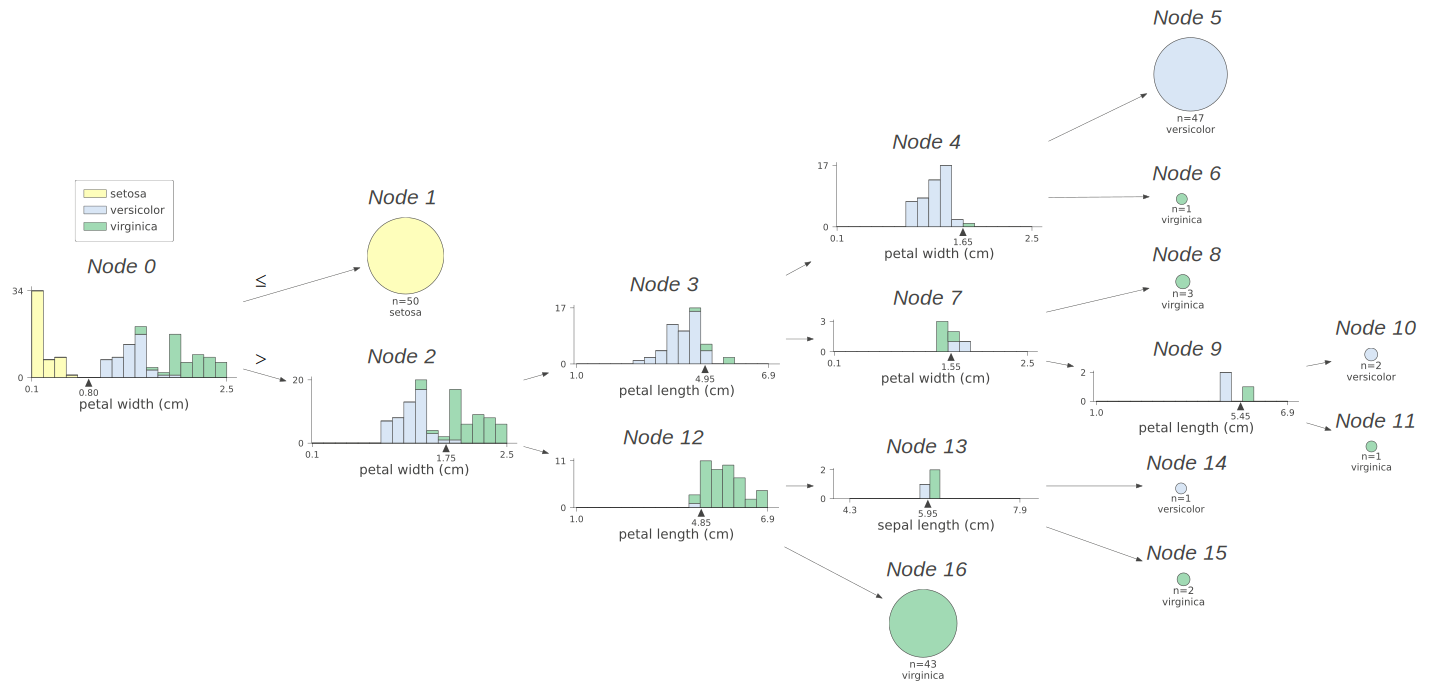

In [11]:
#show nodes label
viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
              #  histtype= 'barstacked',
               scale = 1.5,
               orientation='LR',
               show_node_labels=True)
viz

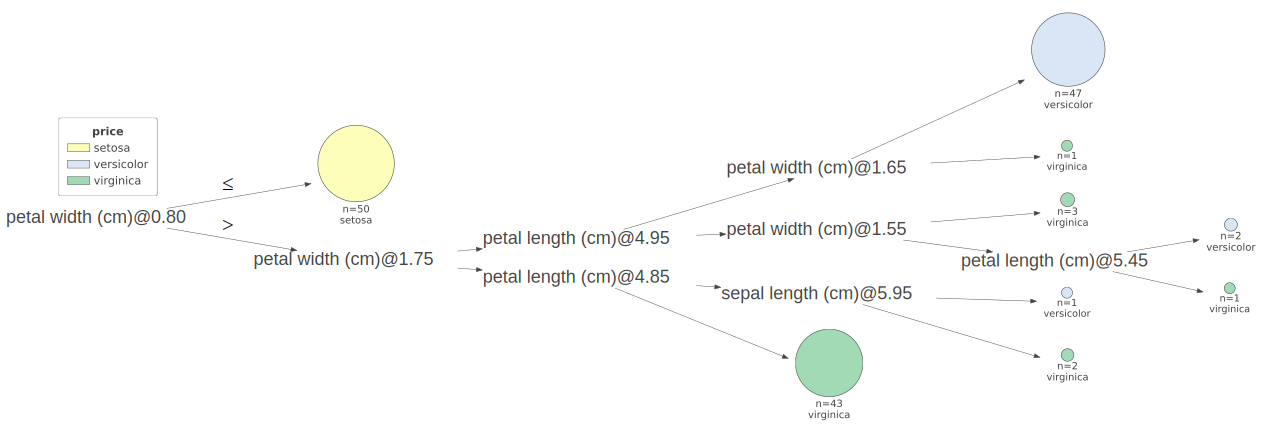

In [12]:
#without any graph
viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked',
               scale = 1.5,
               orientation='LR',
               fancy=False)
viz

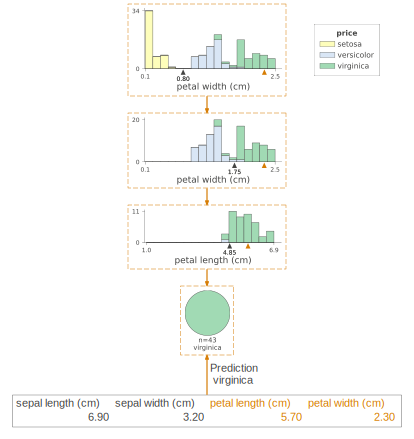

In [13]:
#7. Show just prediction path, nothing else
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               X=X,
               show_just_path=True)
viz

In [14]:
#Prediction Path in Plain english
print(explain_prediction_path(clas, X, feature_names=iris.feature_names, explanation_type="plain_english"))

4.85 <= petal length (cm) 
1.75 <= petal width (cm) 



AxesSubplot(0.125,0.125;0.775x0.755)


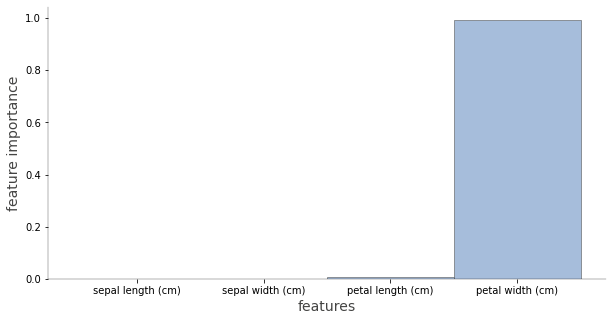

In [15]:
#Feature Importance
print(explain_prediction_path(clas, X, feature_names=iris.feature_names, explanation_type="sklearn_default"))

In [16]:
# #Univariate Regression
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.tree import DecisionTreeRegressor
# from dtreeviz.trees import *

# df_cars = pd.read_csv("cars.csv")
# X, y = df_cars[['WGT']], df_cars['MPG']

# dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
# dt.fit(X, y)

# fig = plt.figure()
# ax = fig.gca()
# rtreeviz_univar(dt, X, y, 'WGT', 'MPG', ax=ax)
# plt.show()